In [1]:
# Import libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
from matplotlib import pyplot as plt

In [2]:
# Get the medal type details dataset
df_medal_type_details = pd.read_csv('../data/etl/medals_by_type_game_country_season_discip_event_gender.csv')
df_medal_type_details.head()

,game_name,country_name,game_season,discipline_title,event_title,event_gender,gold,silver,bronze,total_medals
0,Albertville 1992,Austria,Winter,Alpine Skiing,alpine combined women,Women,1.0,1.0,NaN,2.0
1,Albertville 1992,Austria,Winter,Alpine Skiing,downhill men,Men,1.0,NaN,1.0,2.0
2,Albertville 1992,Austria,Winter,Alpine Skiing,downhill women,Women,NaN,NaN,1.0,1.0
3,Albertville 1992,Austria,Winter,Alpine Skiing,giant slalom women,Women,NaN,1.0,NaN,1.0
4,Albertville 1992,Austria,Winter,Alpine Skiing,slalom men,Men,NaN,NaN,1.0,1.0


In [3]:
# Function to slice the medal details dataset
def slice_medal_type_details_data(data_to_select: dict[str, str]) -> pd.DataFrame:
    keep_cols = ['gold', 'silver', 'bronze', 'total_medals']
    group_medal_cols = list(data_to_select.keys())
    group_medal_cols.append('country_name')
    drop_medal_cols: list[str] = []
    for col in df_medal_type_details.columns:
        if col not in group_medal_cols:
            if col not in keep_cols:
                drop_medal_cols.append(col)    

    df_slice = df_medal_type_details.copy()
    for key, value in data_to_select.items():
        df_slice = df_slice[df_slice[key] == value]

    df_slice = df_slice.drop(columns=drop_medal_cols)
    df_slice = df_slice.groupby(group_medal_cols).sum().reset_index()
    df_slice.sort_values(by='total_medals', ascending=False, inplace=True)
    return df_slice.reset_index(drop=True)

In [16]:
def sort_select_and_drop_columns(df: pd.DataFrame, data_to_select: dict[str, str], num_countries: int = 10) -> pd.DataFrame:
    drop_medal_cols: list[str] = ['total_medals']
    for key in data_to_select.keys():
        drop_medal_cols.append(key)

    df_clean = df.sort_values('total_medals', ascending=False)[:num_countries]
    df_clean: pd.DataFrame = df_clean.drop(columns=drop_medal_cols)
    df_clean.set_index('country_name', inplace=True)
    return df_clean


In [22]:
def plot_medals_by_type(df: pd.DataFrame, title: str) -> None:
    ax = df.plot(kind='bar', stacked=True, color=['peru', 'silver', 'gold'], figsize=(10, 8))
    plt.title(title, size=16)
    plt.legend(title='Medal Type')
    plt.xlabel('Country')
    plt.ylabel('Medal Count')
    plt.show()

In [10]:
# Men's winter Albertville 1992 games medal count
data_to_select = {
    'game_name': 'Albertville 1992',
    'game_season': 'Winter', 
    'event_gender': 'Men'
}
df = slice_medal_type_details_data(data_to_select)
print(f'Toal number of medals: {df.total_medals.sum()}')
df.head()

Toal number of medals: 93.0


,game_name,game_season,event_gender,country_name,gold,silver,bronze,total_medals
0,Albertville 1992,Winter,Men,Norway,9.0,5.0,4.0,18.0
1,Albertville 1992,Winter,Men,Austria,3.0,4.0,6.0,13.0
2,Albertville 1992,Winter,Men,Germany,5.0,4.0,1.0,10.0
3,Albertville 1992,Winter,Men,Italy,2.0,5.0,2.0,9.0
4,Albertville 1992,Winter,Men,Finland,2.0,0.0,3.0,5.0


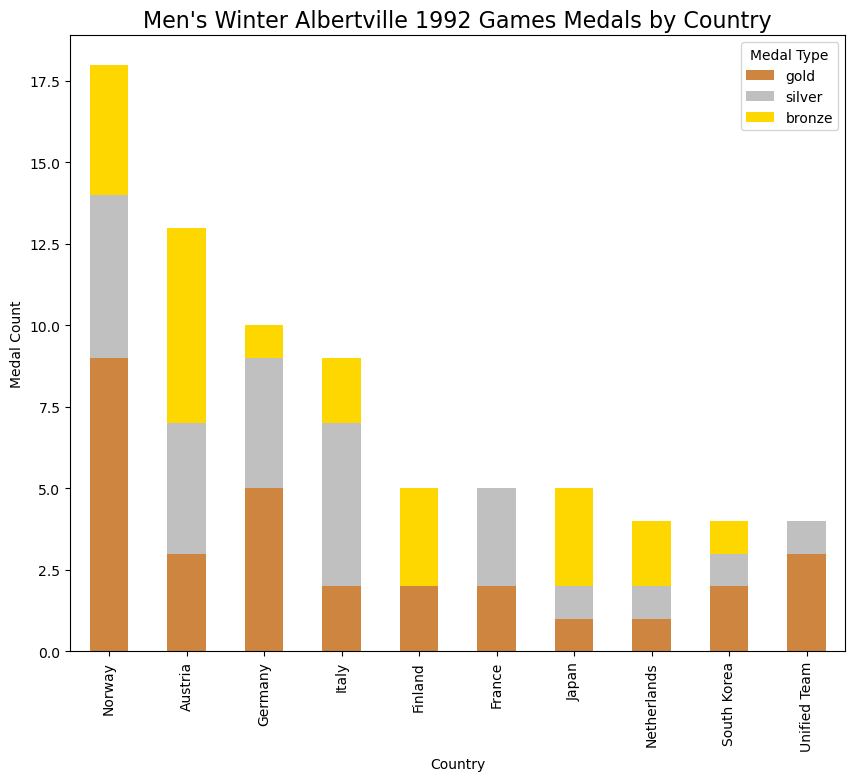

In [23]:
# Sort and plot the top 10 countries
df_sorted = sort_select_and_drop_columns(df, data_to_select, 10)
plot_medals_by_type(df_sorted, "Men's Winter Albertville 1992 Games Medals by Country")